In [81]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the data

In [82]:
base_path = "."
destination_data_h5_path = os.path.join(base_path, "..", "datasets", "CoffeeSales.h5")
source_data = os.path.join(base_path, "data", "coffee_sales", "index.csv")

In [83]:
df = pd.read_csv(source_data)
print(df.shape)

(1653, 6)


In [84]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Group by days

In [85]:
# Count the number of coffee sold each day
daily_sales = df.groupby(['date', 'coffee_name']).size().unstack(fill_value=0)
daily_sales.index.names = ['date']



In [86]:
# Fill in missing values
daily_sales = daily_sales.resample('D').first()

daily_without_nans = pd.DataFrame()
for coffee in daily_sales.columns:
    daily_i = daily_sales[[coffee]].copy()
    daily_i.ffill(inplace=True)
    daily_i.bfill(inplace=True)
    daily_without_nans = pd.concat([daily_without_nans, daily_i], axis=1)
    
daily_sales = daily_without_nans

In [87]:
# Check no more nan values
any_nan = daily_sales.isnull().sum()
print(any_nan)

coffee_name
Americano              0
Americano with Milk    0
Cappuccino             0
Cocoa                  0
Cortado                0
Espresso               0
Hot Chocolate          0
Latte                  0
dtype: int64


In [88]:
# Count the number of coffees sold each day
daily_sales['Total'] = daily_sales.sum(axis=1)
daily_sales.head()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total
date,,,,,,,,,
2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0,11.0
2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,10.0
2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0
2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0


In [89]:
# Find nan values
any_nan = daily_sales.isnull().sum()
print(any_nan)


coffee_name
Americano              0
Americano with Milk    0
Cappuccino             0
Cocoa                  0
Cortado                0
Espresso               0
Hot Chocolate          0
Latte                  0
Total                  0
dtype: int64


# Group by months

In [90]:
# Count the number of coffee sold each month
monthly_sales = df.groupby([df['date'].dt.to_period('M'), 'coffee_name']).size().unstack(fill_value=0)
monthly_sales.index.names = ['month']

# Count the number of coffees sold each day
monthly_sales['Total'] = df.groupby(df['date'].dt.to_period('M')).size()
monthly_sales.head()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total
month,,,,,,,,,
2024-03,36,34,20,6,30,10,22,48,206
2024-04,35,42,43,6,19,7,13,31,196
2024-05,48,58,55,9,17,8,14,58,267
2024-06,14,69,46,5,19,10,14,50,227
2024-07,36,65,32,9,14,14,11,56,237


# Save the data

In [91]:
daily_sales.to_hdf(destination_data_h5_path, key='daily_sales', mode='w')
monthly_sales.to_hdf(destination_data_h5_path, key='monthly_sales', mode='a')

# Plot the data

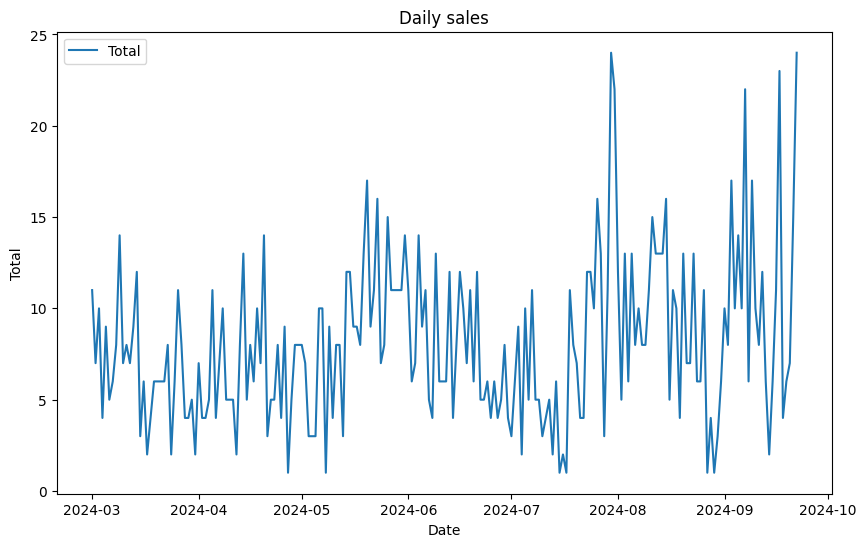

In [92]:
plt.figure(figsize=(10,6))
plt.plot(daily_sales[['Total']], label='Total')
plt.title('Daily sales')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

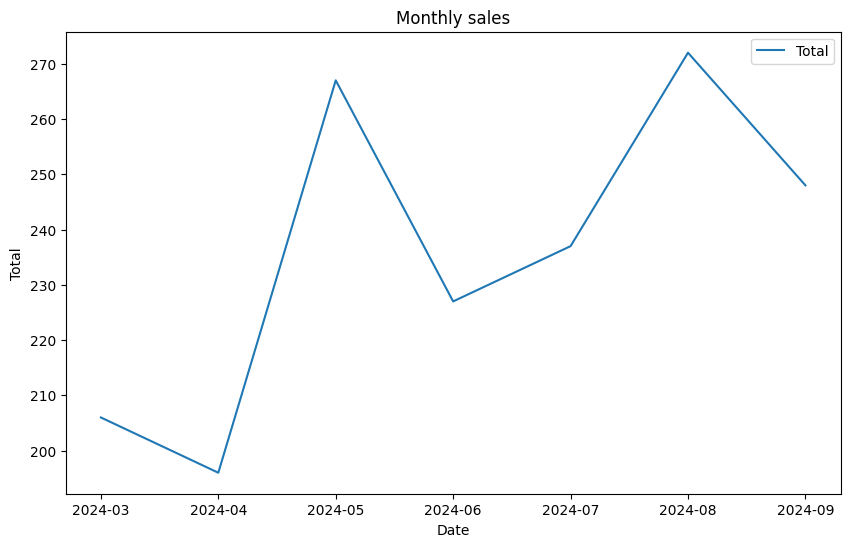

In [93]:
plt.figure(figsize=(10,6))
monthly_sales_str = monthly_sales.copy()
monthly_sales_str.index=monthly_sales.index.to_series().astype(str)
plt.plot(monthly_sales_str[['Total']], label='Total')
plt.title('Monthly sales')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()